# Section 6 Time Series with Pandas

---

## DateTime Index

In [2]:
from datetime import datetime as dt

In [3]:
my_year = 2020
my_month = 1
my_day = 2
my_hour = 13
my_min = 30
my_sec = 15

In [5]:
my_date = dt(my_year,my_month,my_day)

In [6]:
my_date

datetime.datetime(2020, 1, 2, 0, 0)

In [7]:
my_date_time = dt(my_year,my_month,my_day,my_hour,my_min,my_sec)

In [8]:
my_date_time

datetime.datetime(2020, 1, 2, 13, 30, 15)

In [9]:
my_date_time.day

2

In [10]:
my_date_time.hour

13

In [11]:
type(my_date_time)

datetime.datetime

In [12]:
import numpy as np

In [13]:
np.array(['2020-03-15','2020-03-16','2020-03-17'])

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='<U10')

In [14]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64')

array(['2020-03-15', '2020-03-16', '2020-03-17'], dtype='datetime64[D]')

In [16]:
np.array(['2020-03-15','2020-03-16','2020-03-17'],dtype='datetime64[Y]')

array(['2020', '2020', '2020'], dtype='datetime64[Y]')

In [18]:
np.arange('2018-06-01','2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

In [19]:
np.arange('1968','1976', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

In [4]:
filespath = r"F:\Documentos\Udemy\Python for Time Series Data Analysis\UDEMY_TSA_FINAL\Data"

---

## DateTime Index Part Two

In [15]:
import pandas as pd
import numpy as np

In [2]:
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [3]:
pd.date_range('Jan 01, 2018', periods=7, freq='D')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07'],
              dtype='datetime64[ns]', freq='D')

In [4]:
pd.to_datetime(['1/2/2018', 'Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [10]:
pd.to_datetime(['2/1/2018', '3/1/2018'])

DatetimeIndex(['2018-02-01', '2018-03-01'], dtype='datetime64[ns]', freq=None)

In [11]:
pd.to_datetime(['2/1/2018', '3/1/2018'], format='%d/%m/%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [13]:
pd.to_datetime(['2--1--2018', '3--1--2018'], format='%d--%m--%Y')

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [16]:
data=np.random.randn(3,2)
cols = ['A', 'B']
print (data)

[[-2.06463208  0.60547039]
 [ 0.02210451 -0.01146583]
 [-0.46672133  0.13966665]]


In [17]:
idx = pd.date_range('2020-01-01',periods=3,freq='D')

df = pd.DataFrame(data, index=idx, columns=cols)

In [18]:
df

,A,B
2020-01-01,-2.064632,0.605470
2020-01-02,0.022105,-0.011466
2020-01-03,-0.466721,0.139667


In [19]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03'], dtype='datetime64[ns]', freq='D')

In [20]:
df.index.max()

Timestamp('2020-01-03 00:00:00', freq='D')

In [21]:
df.index.argmax()

2

In [23]:
df.index.min()

Timestamp('2020-01-01 00:00:00', freq='D')

In [24]:
df.index.argmin()

0

---

## Time resampling

In [26]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv(filespath+"\\"+"starbucks.csv")
df.head()

,Date,Close,Volume
0,2015-01-02,38.0061,6906098
1,2015-01-05,37.2781,11623796
2,2015-01-06,36.9748,7664340
3,2015-01-07,37.8848,9732554
4,2015-01-08,38.4961,13170548


In [29]:
df = pd.read_csv(filespath+"\\"+"starbucks.csv", index_col='Date')
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
Close     1006 non-null float64
Volume    1006 non-null int64
dtypes: float64(1), int64(1)
memory usage: 23.6+ KB


In [31]:
df.index

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
       '2018-12-24', '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-31'],
      dtype='object', name='Date', length=1006)

In [32]:
df = pd.read_csv(filespath+"\\"+"starbucks.csv", index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [33]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [34]:
# daily ---> yearly
df.resample(rule='A')

DatetimeIndexResampler [freq=<YearEnd: month=12>, axis=0, closed=right, label=right, convention=start, base=0]

In [35]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [37]:
def first_day(entry):

    # IS THERE AN ENTRY?
    if len(entry) != 0:
        # IF SO, RETURN FIRST ENTRY
        return entry[0]

In [38]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


In [39]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


By using custom function we need to be cautious if datetime index since it differs, or point out to last day of year, not the date that in this case has the first entry data

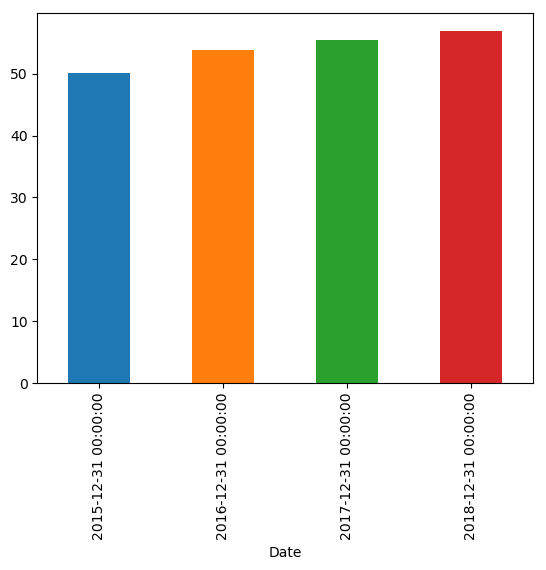

In [43]:
%matplotlib inline
df['Close'].resample('A').mean().plot.bar()

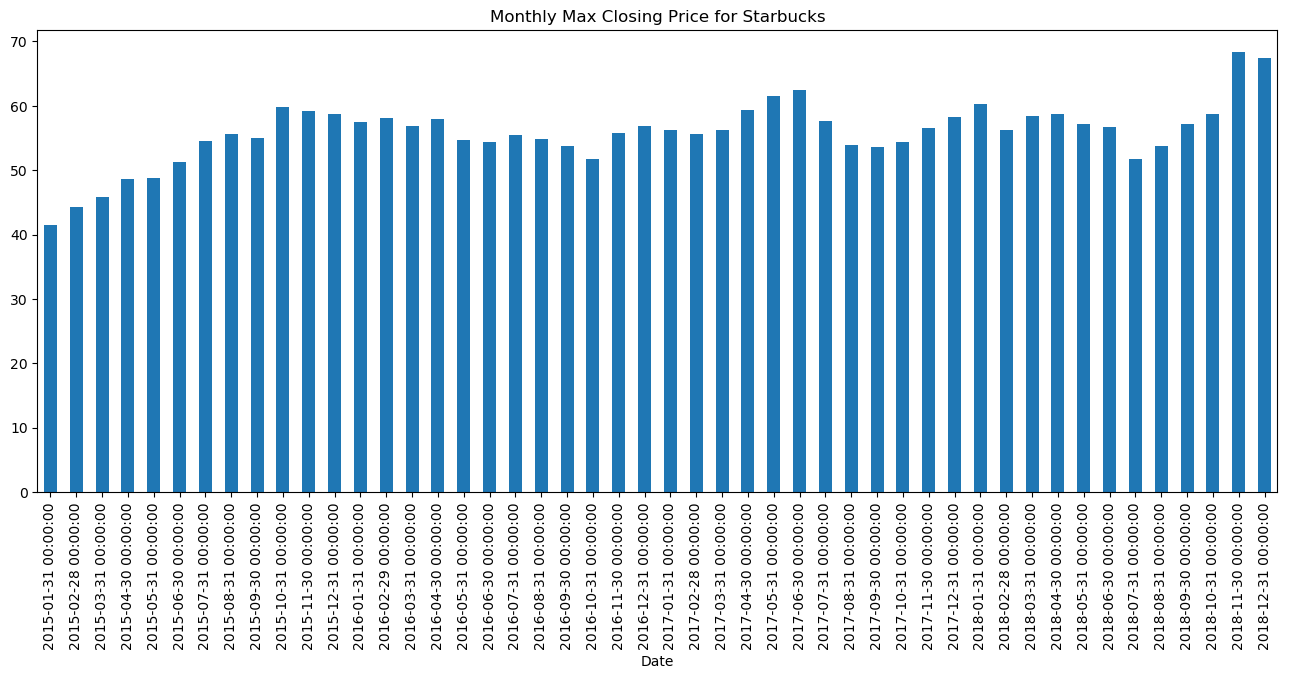

In [44]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

---

## Time Shifting

In [45]:
import pandas as pd
import numpy as np
%matplotlib inline

In [46]:
df = pd.read_csv(filespath+"\\"+"starbucks.csv", index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [47]:
df.tail()

,Close,Volume
Date,,
2018-12-24,60.56,6323252
2018-12-26,63.08,16646238
2018-12-27,63.20,11308081
2018-12-28,63.39,7712127
2018-12-31,64.40,7690183


In [48]:
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
2015-01-09,38.4961,13170548.0
2015-01-12,37.2361,27556706.0
2015-01-13,37.4415,10021486.0
2015-01-14,37.7401,11040702.0


In [49]:
df.shift(1).tail()

,Close,Volume
Date,,
2018-12-24,61.39,23524888.0
2018-12-26,60.56,6323252.0
2018-12-27,63.08,16646238.0
2018-12-28,63.20,11308081.0
2018-12-31,63.39,7712127.0


In [50]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [51]:
df.shift(periods=1,freq='M').head()

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548


In [58]:
df.shift(periods=1, fill_value=0)

TypeError: shift() got an unexpected keyword argument 'fill_value'

---

## Rolling and Expanding

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [5]:
df = pd.read_csv(filespath+"\\"+"starbucks.csv", index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


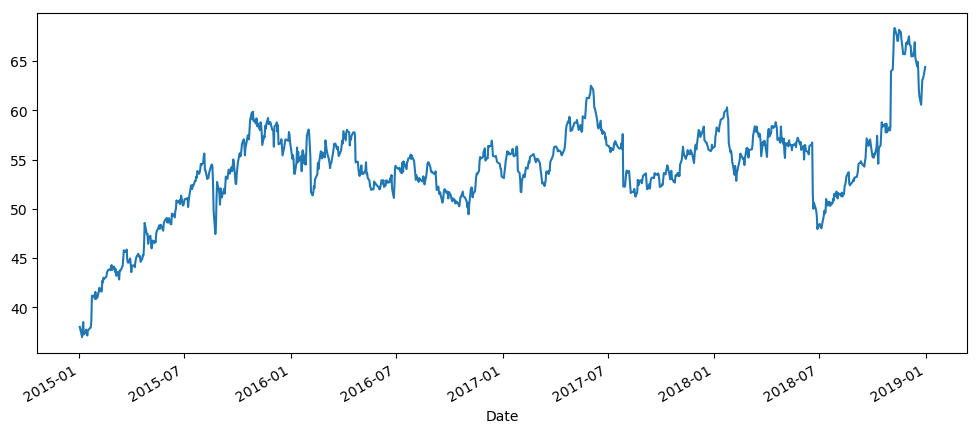

In [8]:
df['Close'].plot(figsize=(12,5))

In [9]:
df.rolling(window=7).mean()

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


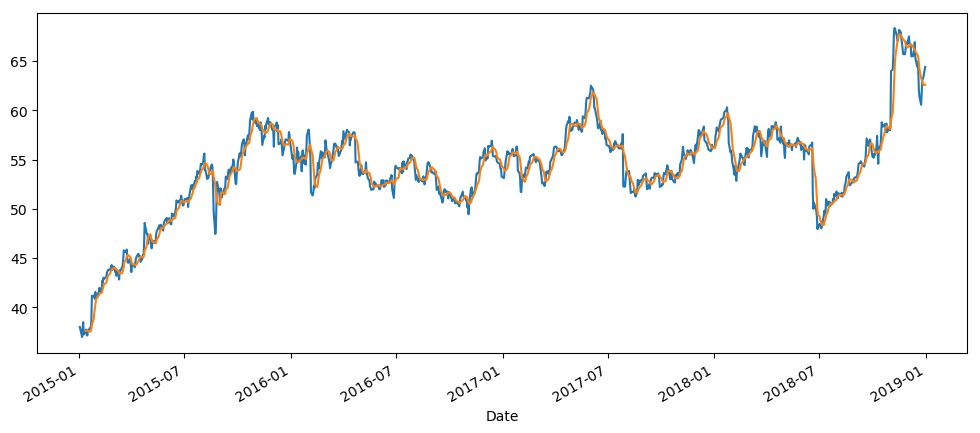

In [10]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=7).mean()['Close'].plot()

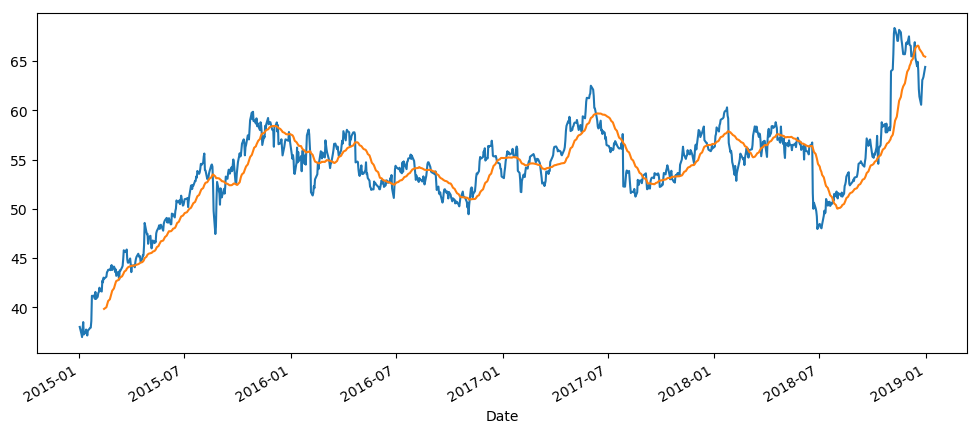

In [11]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

In [12]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()

In [13]:
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


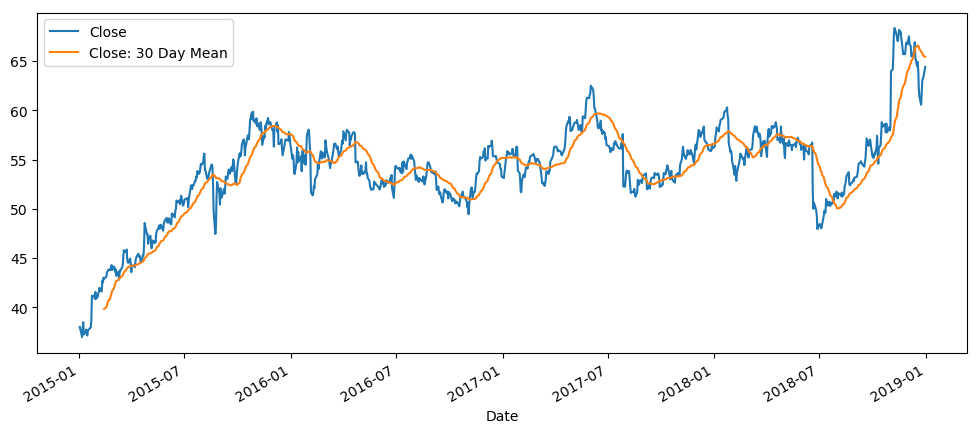

In [14]:
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12,5))

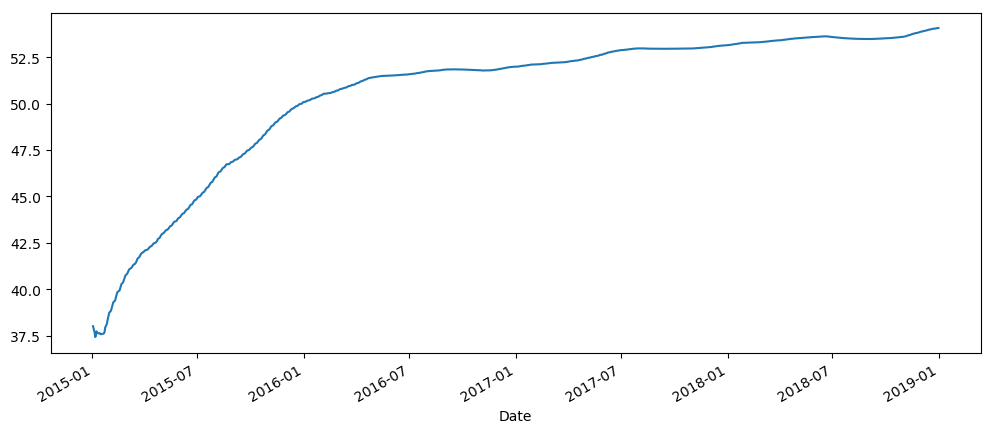

In [15]:
df['Close'].expanding().mean().plot(figsize=(12,5))

---

## Visualizing Time Series Data

In [16]:
import pandas as pd
%matplotlib inline

In [17]:
filespath = r"F:\Documentos\Udemy\Python for Time Series Data Analysis\UDEMY_TSA_FINAL\Data"
df = pd.read_csv(filespath+"\\"+"starbucks.csv", index_col='Date', parse_dates=True)
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [18]:
df.index
#in case needed df.index = pd;to_datetime(df.index)

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [19]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


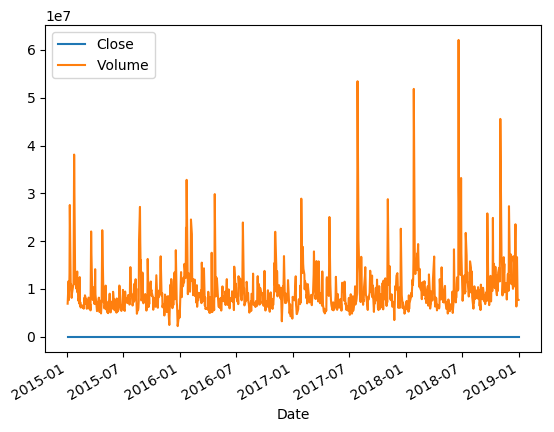

In [20]:
df.plot()

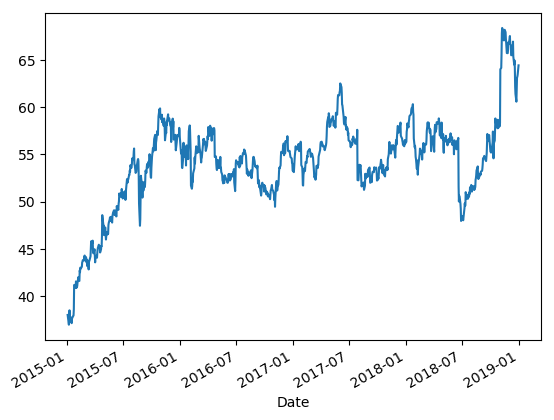

In [23]:
df['Close'].plot()

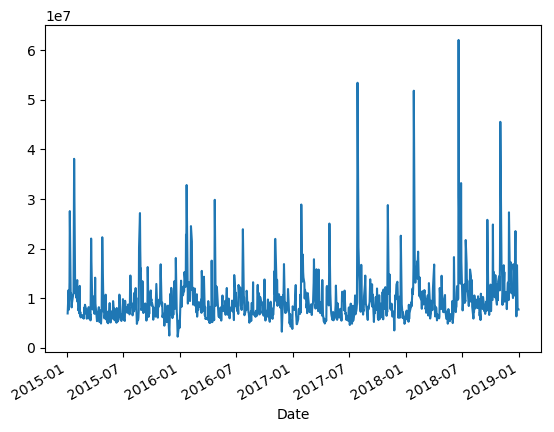

In [25]:
df['Volume'].plot()

In [26]:
title = 'TITLE'
ylabel = 'Y LABEL'
xlabel = 'X LABEL'

[Text(0, 0.5, 'Y LABEL'), Text(0.5, 0, 'X LABEL')]

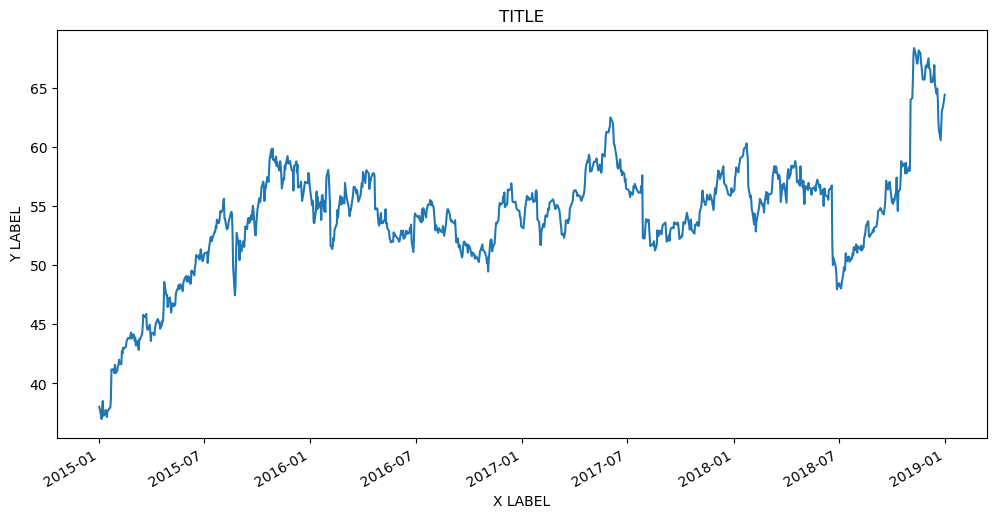

In [27]:
ax = df['Close'].plot(figsize=(12,6), title=title,)
ax.set(xlabel=xlabel, ylabel=ylabel)

[Text(0, 0.5, 'Y LABEL'), Text(0.5, 0, 'X LABEL')]

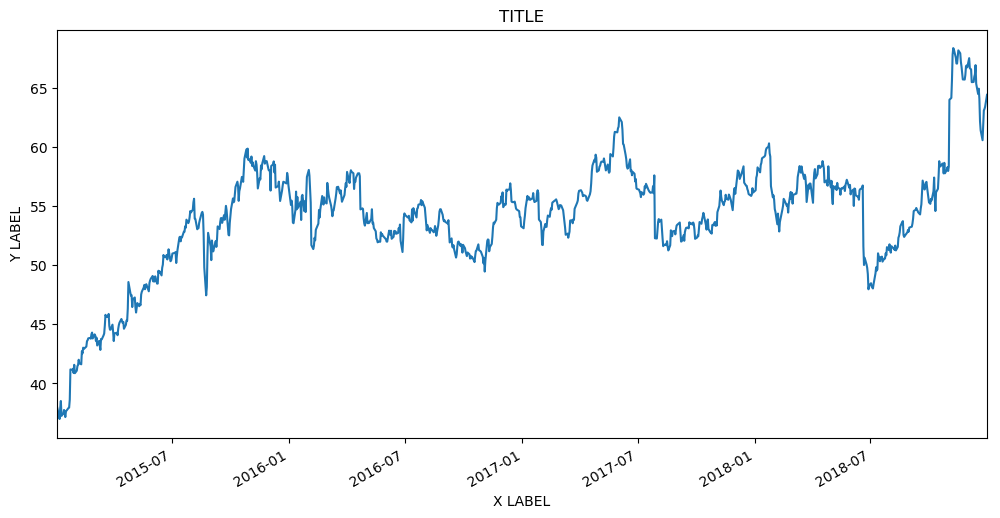

In [31]:
ax = df['Close'].plot(figsize=(12,6), title=title,)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

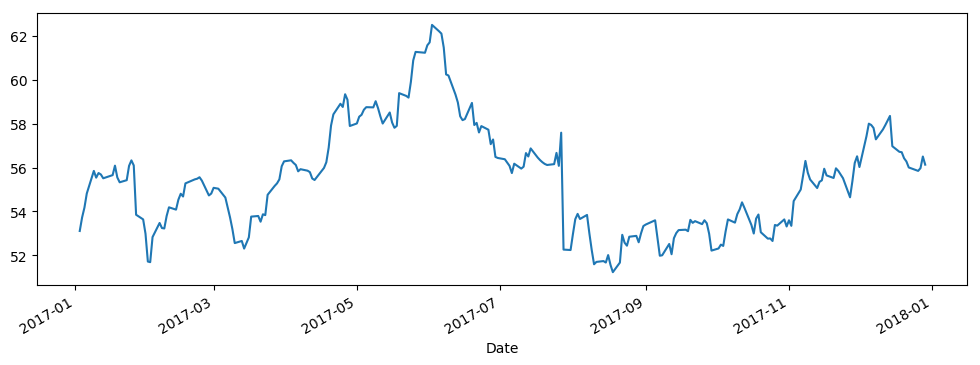

In [33]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4))

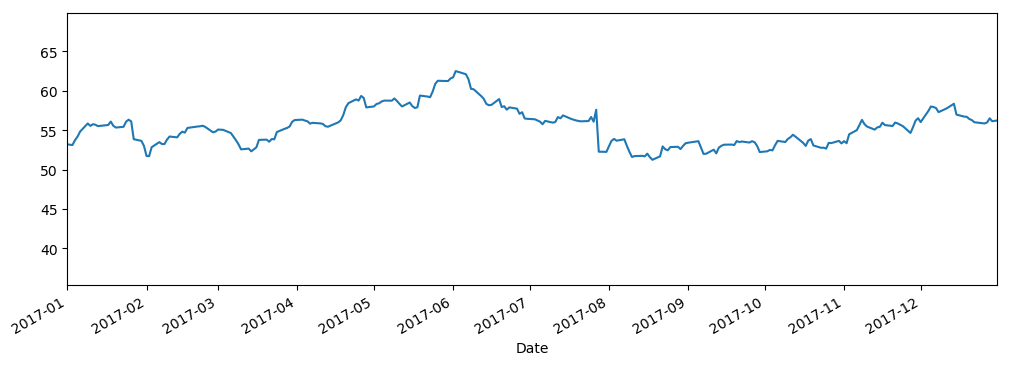

In [35]:
df['Close'].plot(figsize=(12,4), xlim=['2017-01-01','2017-12-31'])

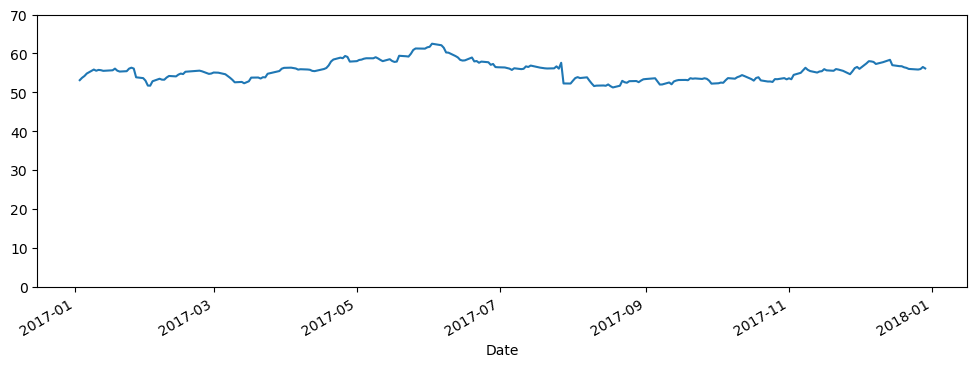

In [36]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4),ylim=[0,70])

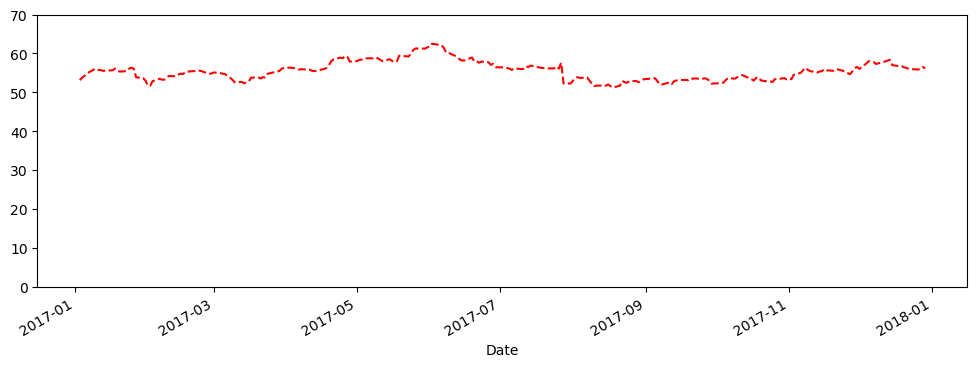

In [37]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,4),ylim=[0,70], ls='--',c='red')

---

## Visualizing Time Series Data Part Two

In [38]:
import pandas as pd
from matplotlib import dates

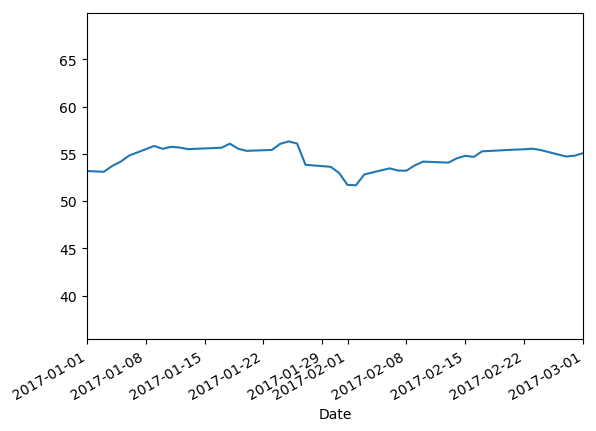

In [39]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'])

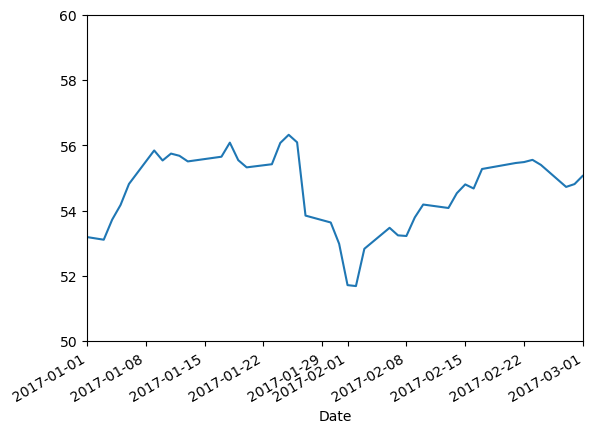

In [40]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60])

[Text(0.5, 0, '')]

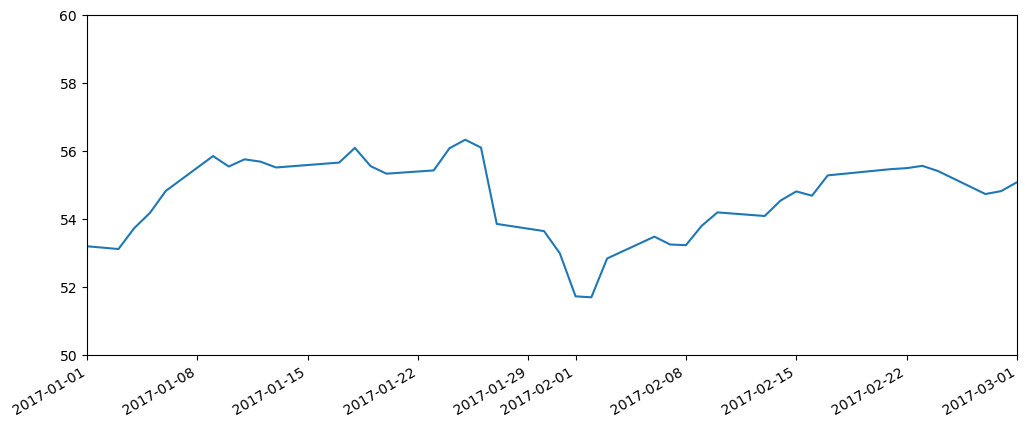

In [41]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')

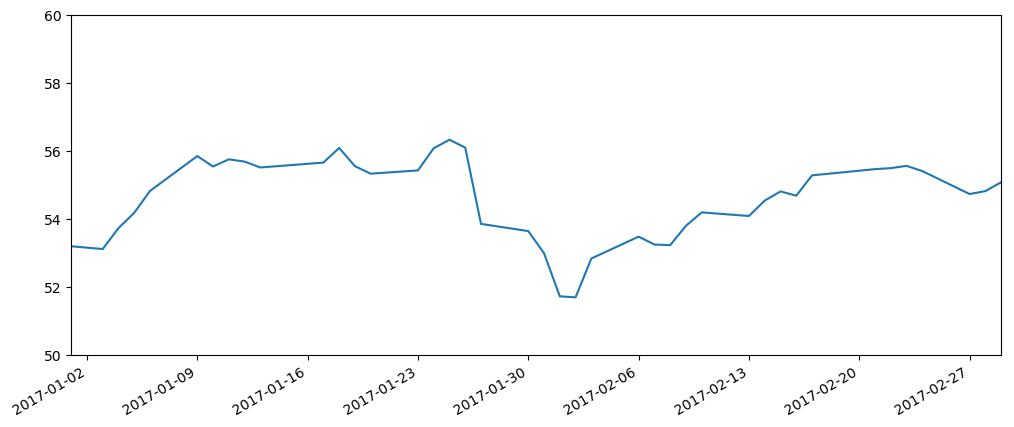

In [42]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

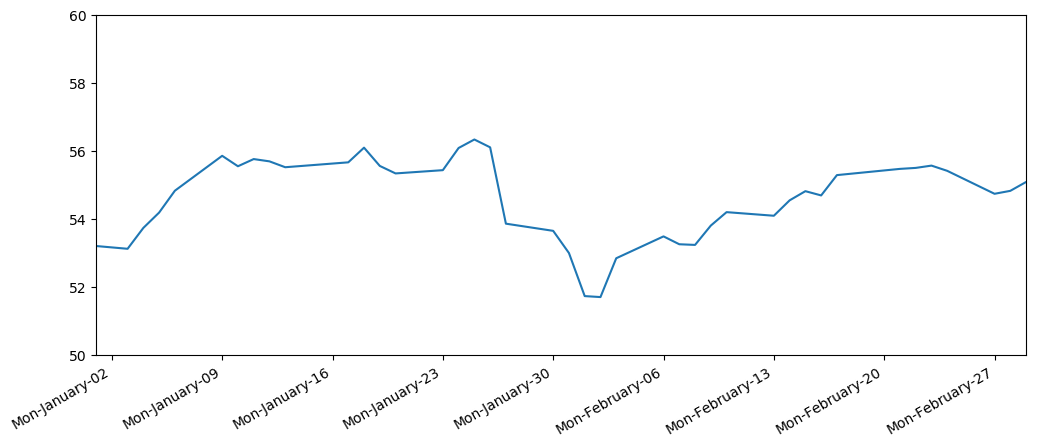

In [43]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%a-%B-%d'))

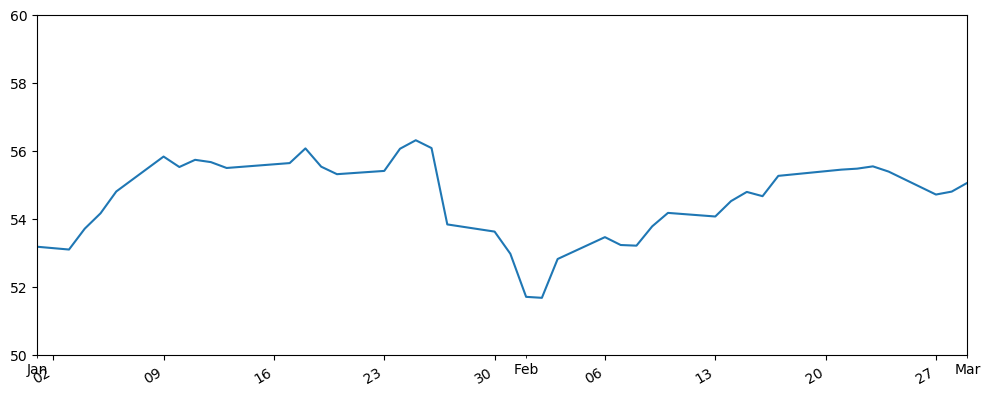

In [44]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')
# major axis
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))
#minor axis
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

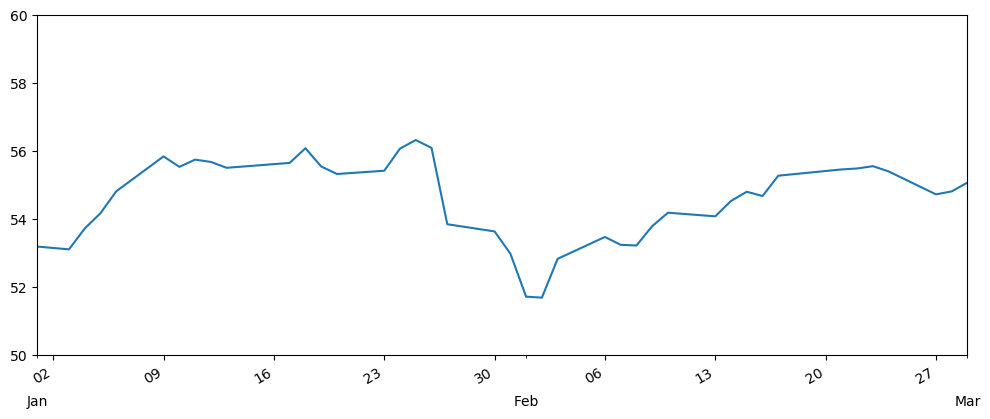

In [45]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')
# major axis
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))
#minor axis
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

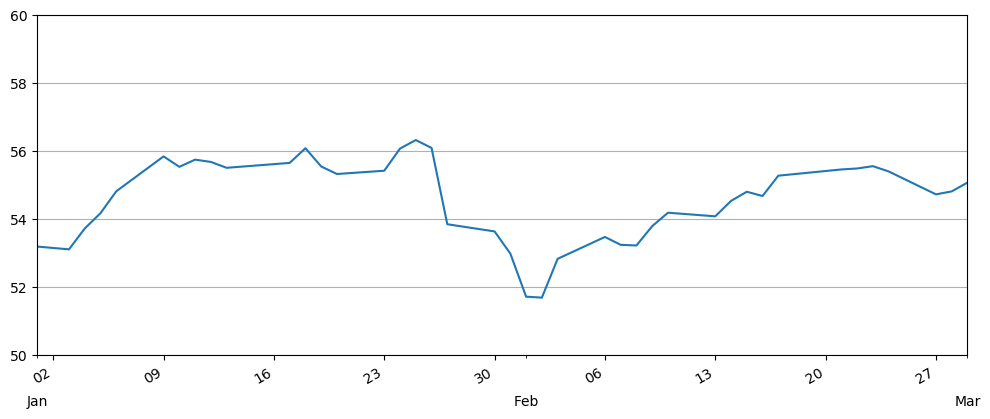

In [48]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'], ylim=[50,60],figsize=(12,5))
ax.set(xlabel='')
# major axis
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))
# minor axis
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
#ax.xaxis.grid(True)

---

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Pandas Time Series Exercise Set #1

For this set of exercises we'll use a dataset containing monthly milk production values in pounds per cow from January 1962 to December 1975.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [49]:
# RUN THIS CELL
import pandas as pd
%matplotlib inline

df = pd.read_csv(filespath+'/monthly_milk_production.csv', encoding='utf8')
title = "Monthly milk production: pounds per cow. Jan '62 - Dec '75"

print(len(df))
print(df.head())

168
      Date  Production
0  1962-01         589
1  1962-02         561
2  1962-03         640
3  1962-04         656
4  1962-05         727


So <tt>df</tt> has 168 records and 2 columns.

### 1. What is the current data type of the Date column?
HINT: We show how to list column dtypes in the first set of DataFrame lectures.

In [55]:
# CODE HERE
df.dtypes

Date          object
Production     int64
dtype: object

In [ ]:
# DON'T WRITE HERE

Date          object
Production     int64
dtype: object

### 2. Change the Date column to a datetime format

In [60]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date          datetime64[ns]
Production             int64
dtype: object

In [ ]:
# DON'T WRITE HERE

Date          datetime64[ns]
Production             int64
dtype: object

### 3. Set the Date column to be the new index

In [61]:
df.set_index('Date',inplace=True)
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
# DON'T WRITE HERE

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


### 4. Plot the DataFrame with a simple line plot. What do you notice about the plot?

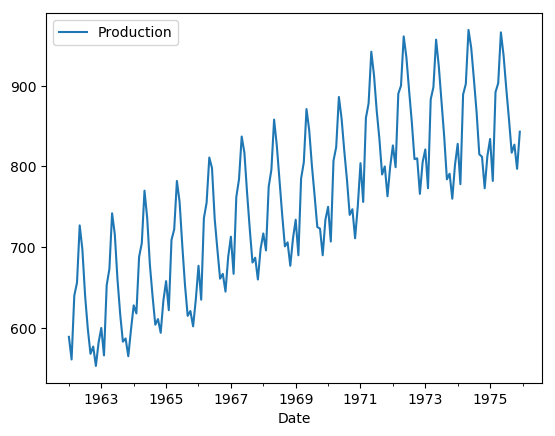

In [62]:
df.plot()

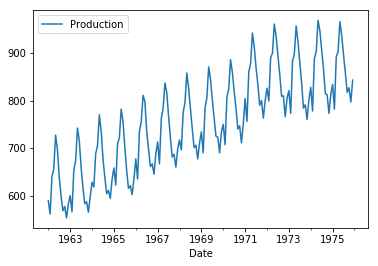

In [ ]:
# DON'T WRITE HERE

### 5. Add a column called 'Month' that takes the month value from the index
HINT: You have to call <tt>df.index</tt> as <tt>df['Date']</tt> won't work.

<strong>BONUS: See if you can obtain the <em>name</em> of the month instead of a number!</strong>

In [63]:
df['Month'] = df.index.month
df.head()

,Production,Month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


In [64]:
df['Month_name'] = df.index.strftime('%B')
df.head()

,Production,Month,Month_name
Date,,,
1962-01-01,589,1,January
1962-02-01,561,2,February
1962-03-01,640,3,March
1962-04-01,656,4,April
1962-05-01,727,5,May


In [ ]:
# DON'T WRITE HERE

,Production,Month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


In [ ]:
# BONUS SOLUTION:

,Production,Month
Date,,
1962-01-01,589,January
1962-02-01,561,February
1962-03-01,640,March
1962-04-01,656,April
1962-05-01,727,May


### 6. Create a BoxPlot that groups by the Month field

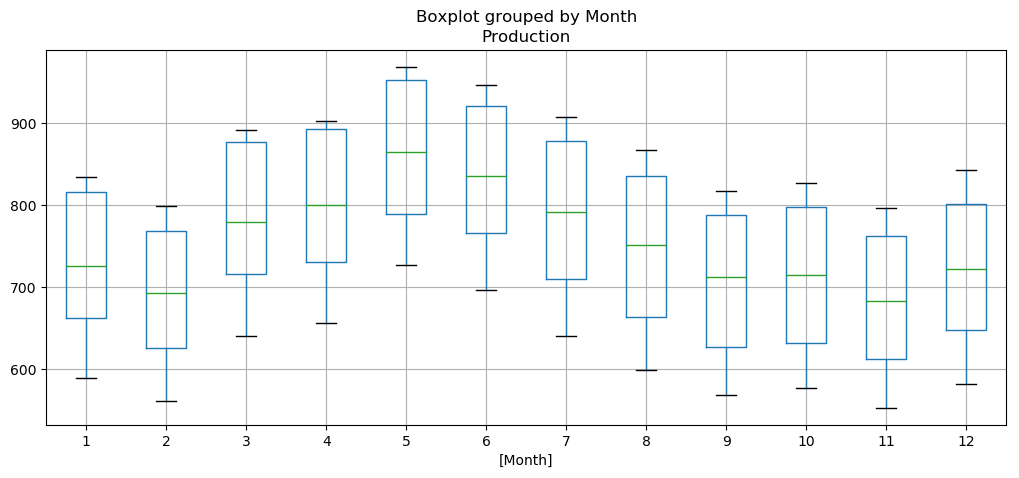

In [73]:
df[['Production','Month']].boxplot(by='Month',figsize=(12,5))

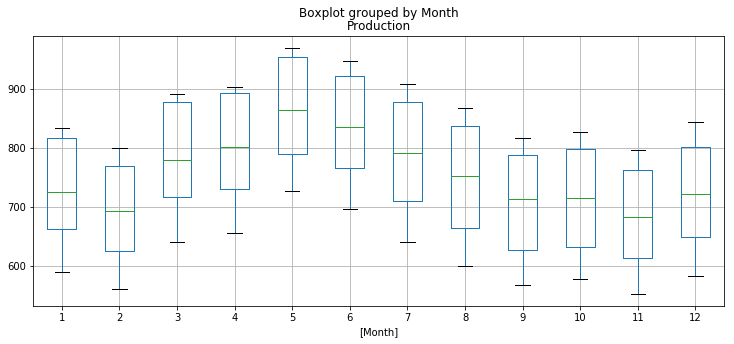

In [ ]:
# DON'T WRITE HERE

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Time Series with Pandas Project Exercise

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Import any necessary libraries.**

In [74]:
# CODE HERE
import pandas as pd
%matplotlib inline

**Read in the data UMTMVS.csv file from the Data folder**

In [ ]:
# CODE HERE

In [ ]:
filespath = r"F:\Documentos\Udemy\Python for Time Series Data Analysis\UDEMY_TSA_FINAL\Data"
df = pd.read_csv(filespath+"\\"+"UMTMVS.csv")#, index_col='DATE', parse_dates=True)


**Check the head of the data**

In [78]:
# CODE HERE
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


**Set the DATE column as the index.**

In [79]:
# CODE HERE
df = pd.read_csv(filespath+"\\"+"UMTMVS.csv", index_col='DATE', parse_dates=True)
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [84]:
df2 = pd.read_csv(filespath+"\\"+"UMTMVS.csv")
df2.set_index('DATE',inplace=True)
df2.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


**Check the data type of the index.**

In [89]:
# CODE HERE
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

In [87]:
df2.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

In [ ]:
# CODE HERE


In [91]:
df2.index=pd.to_datetime(df2.index)
df2.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Plot out the data, choose a reasonable figure size**

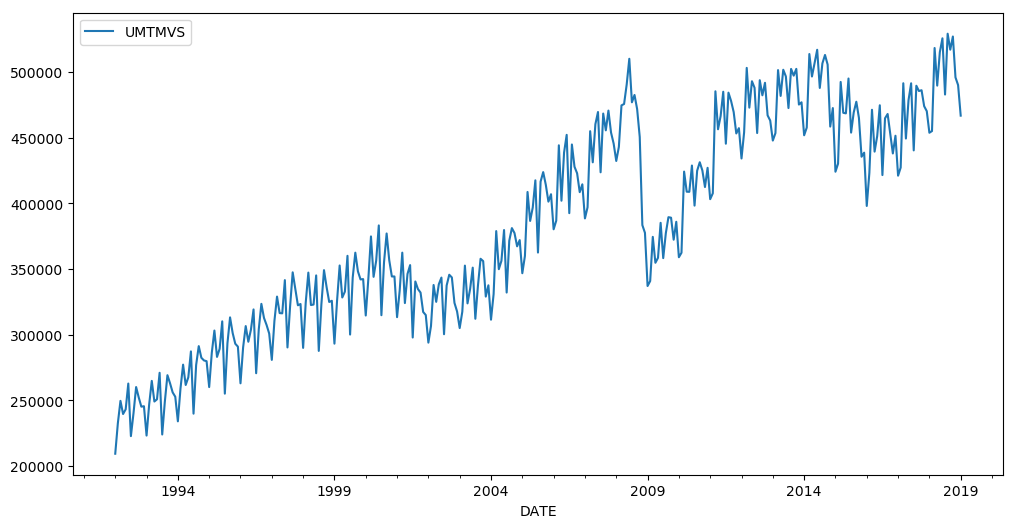

In [92]:
# CODE HERE
df.plot(figsize=(12,6))

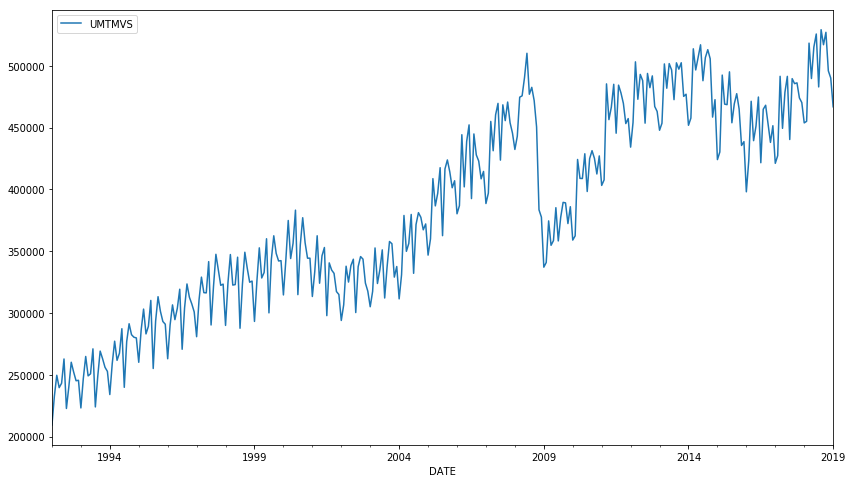

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [98]:
#CODE HERE
((df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01'])*100

UMTMVS    38.472149
dtype: float64

UMTMVS    38.472149
dtype: float64

**What was the percent decrease from Jan 2008 to Jan 2009?**

In [97]:
#CODE HERE
((df.loc['2009-01-01']-df.loc['2008-01-01']) / df.loc['2008-01-01'])*100

UMTMVS   -22.022775
dtype: float64

UMTMVS   -22.022775
dtype: float64

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [100]:
#CODE HERE
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

UMTMVS   2009-01-01
dtype: datetime64[ns]

**What 6 months have the highest value?**

In [102]:
# CODE HERE
df.sort_values(by='UMTMVS',ascending=False).head(6)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


,UMTMVS,Yearly Mean
DATE,,
2018-08-01,529157.0,490453.500000
2018-10-01,527031.0,496482.333333
2018-06-01,525660.0,483611.000000
2018-03-01,518285.0,474351.250000
2018-09-01,516992.0,493075.583333


**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [104]:
# CODE HERE
df.loc['2008-01-01']-df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

UMTMVS    95206.0
dtype: float64

**Create a bar plot showing the average value in millions of dollars per year**

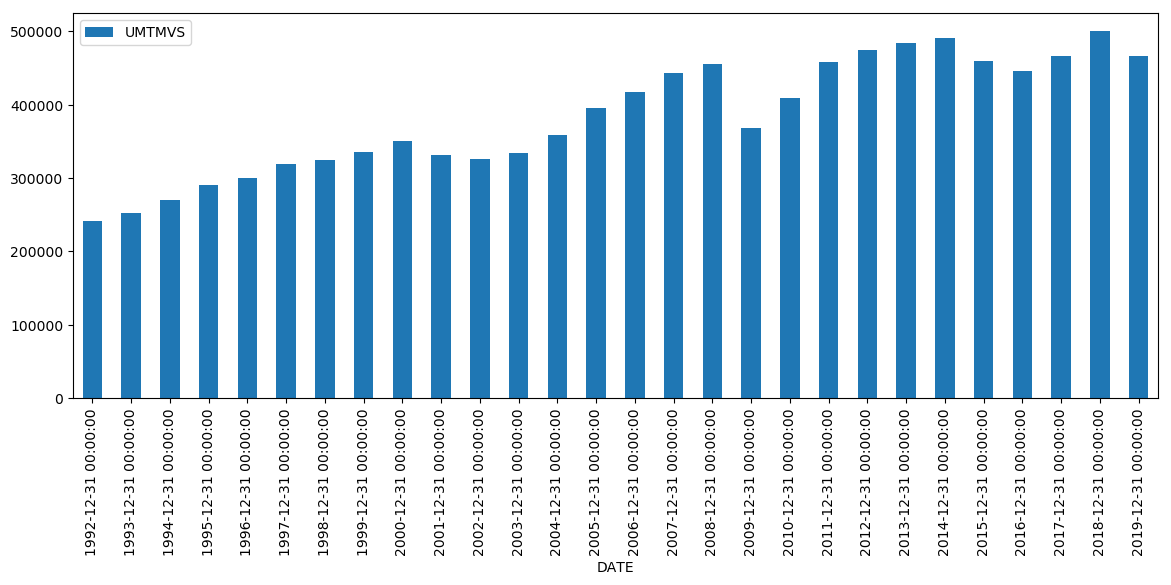

In [107]:
# CODE HERE
#df.resample('Y').mean().plot.bar()
df.resample('Y').mean().plot.bar(figsize=(14,5))

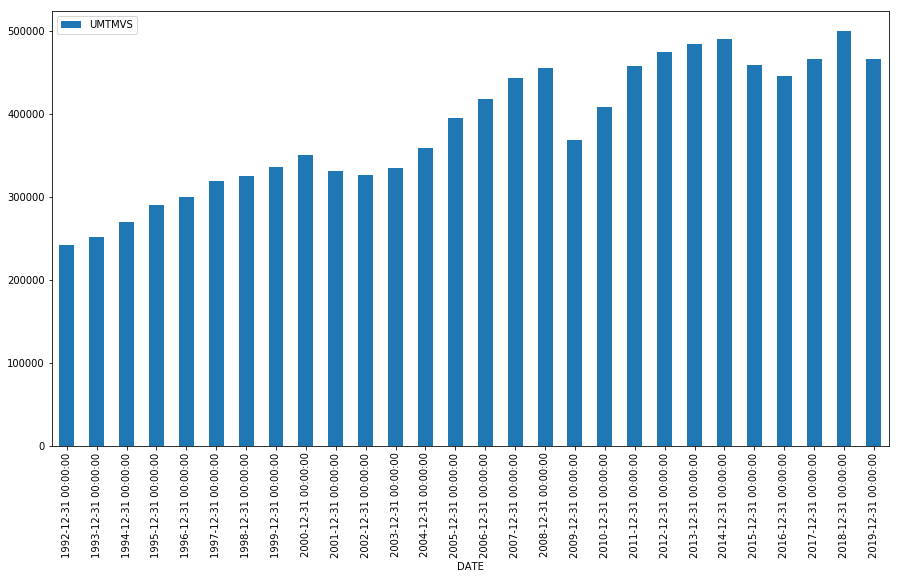

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [120]:
# CODE HERE
yd = df.resample('Y').mean()

In [123]:
yds = yd.shift(1)
change = yd-yds
change.head()

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,9706.083333
1994-12-31,18134.583333
1995-12-31,20130.416667
1996-12-31,9792.583333


,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


In [124]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

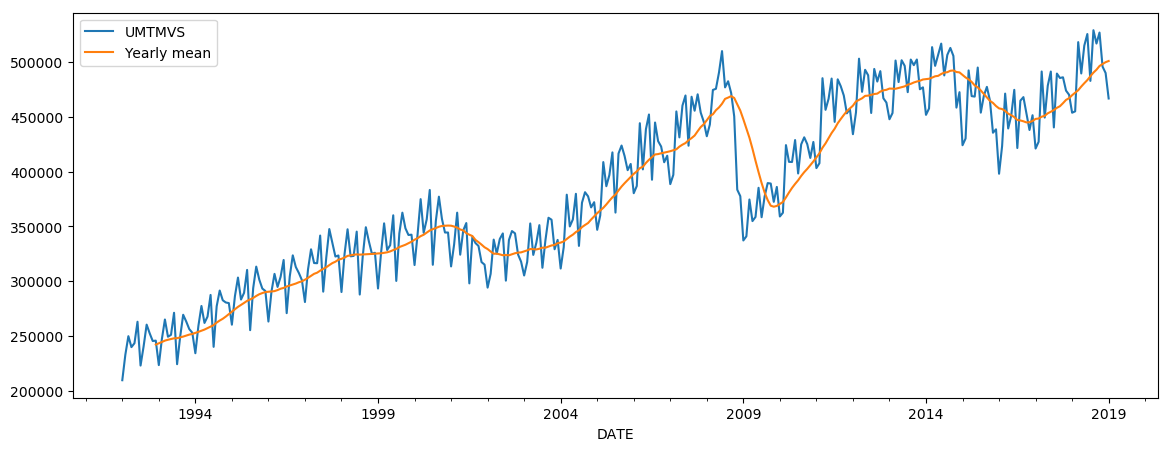

In [119]:
# CODE HERE
ax = df.plot(figsize=(14,5))
df.rolling(window=12).mean().plot(ax=ax)
ax.legend(["UMTMVS", "Yearly mean"])

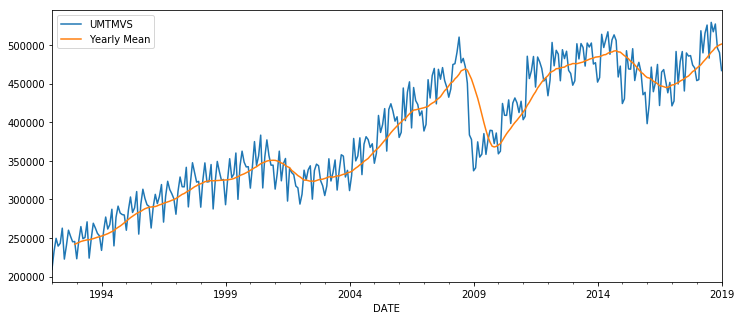

**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [126]:
#CODE HERE
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


In [129]:
df2008 = df.loc['2008-01-01':'2008-12-01']
df2008

,UMTMVS
DATE,
2008-01-01,432307.0
2008-02-01,442996.0
2008-03-01,474592.0
2008-04-01,475667.0
2008-05-01,490500.0
2008-06-01,510081.0
2008-07-01,476948.0
2008-08-01,482530.0
2008-09-01,471799.0


In [130]:
df2008.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [131]:
df2008.max()

UMTMVS    510081.0
dtype: float64

In [133]:
df_pp = df.loc['2008-06-01':]
df_pp.head()

,UMTMVS
DATE,
2008-06-01,510081.0
2008-07-01,476948.0
2008-08-01,482530.0
2008-09-01,471799.0
2008-10-01,450521.0


In [135]:
df_pp[df_pp>=510081.0].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


In [136]:
len(df.loc['2008-06-01':'2014-03-01'])

70

70

# GREAT JOB!